In [1]:
import os
from glob import glob
import shutil

from utils import get_chord_progressions, calculate_melody_results
from melody import Melody

In [2]:
input_folder = '../data/Complete Examples Melodies Auto/v1.2/Real Book'
filepaths = [y for x in os.walk(input_folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [3]:
filepaths[:10]

["../data/Complete Examples Melodies Auto/v1.2/Real Book/'Round Midnight.mid",
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/A Felicidade.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/A Foggy Day.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/A Night In Tunisia.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Accentuate The Positive.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Afro Blue.mid',
 "../data/Complete Examples Melodies Auto/v1.2/Real Book/After You've Gone.mid",
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Afternoon In Paris.mid',
 "../data/Complete Examples Melodies Auto/v1.2/Real Book/Ain't Misbehavin'.mid",
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Airegin.mid']

In [4]:
starting_measure = 2

In [5]:
starting_measure_exceptions = {
    'Real Book - Beauty And The Beast': 5
}

key_exceptions = {
    'Real Book - Dolores': ('Db', 'major'),
    'Real Book - Epistrophy': ('Db', 'major'),
    'Real Book - Giant Steps': ('B', 'major'),
    'Real Book - Speak No Evil': ('C', 'minor'),
    'Real Book - Monk\'s Mood': ('Db', 'major'),
    'Real Book - Beautiful Friendship': ('Db', 'major'),
    'Real Book - House Of Jade': ('C', 'minor'),
    'Real Book - Laura': ('C', 'major'),
    'Real Book - In A Mellow Tone': ('F', 'major'),
    'Real Book - Come Sunday': ('Bb', 'major')
}

to_skip = {
    'Embraceable You',
    'I Don\'t Know Why',
    'In A Mellow Tone'
}

In [6]:
import music21

all_results = {}
for filename in filepaths:
    try:
        starting_measure = 2
        
        chord_progressions = get_chord_progressions('..')

        source = 'Real Book'
        # filename = f"../data/Complete Examples Melodies Auto/v1.2/{source}/A Felicidade.mid"

        melody = Melody(filename, '1.2', '..')
        
        if melody.filename in to_skip:
            continue
        
        melody.setup()
        melody.parse_notes()
        melody.set_song_structure(chord_progressions[melody.song_name])
        
        if melody.time_signature is None:
            melody.errors.append('no time signature')
        elif melody.time_signature[0] != 4:
            melody.errors.append('time signature not 4/4')
        
        if len(melody.errors) > 0:
            raise Exception(melody.errors[0])
        
        if f'{melody.source} - {melody.song_name}' in starting_measure_exceptions:
            starting_measure = starting_measure_exceptions[f'{melody.source} - {melody.song_name}']
            print(f'Using {starting_measure} for {melody.source} - {melody.song_name}')

        if f'{melody.source} - {melody.song_name}' in key_exceptions:
            tonic = key_exceptions[f'{melody.source} - {melody.song_name}'][0]
            mode = key_exceptions[f'{melody.source} - {melody.song_name}'][1]

            melody.key = music21.key.Key(tonic, mode)
            print(f'Using {melody.key.tonic} for {melody.source} - {melody.song_name}')

        melody.manually_align(starting_measure, True)

        results = calculate_melody_results(melody)

        for k, v in results.items():
            all_results[melody.filename + ' -' + str(k) + '-'] = v

#         print(melody.filename)
    #     print(f'N. Repetitions: {len(melody.split_note_info)}')
    #     for k, v in results.items():
    #         print('Repetition ' + str(k))
    #         print(f"HC mean: {v['harmonic_consistency_mean']}, var: {v['harmonic_consistency_var']}")
    #         print(f"Silence Ratio: {v['silence_ratio']}")
    except Exception as e:
        print('#######')
        print(melody.filename, e)
        print('#######')

#######
Afro Blue.mid time signature not 4/4
#######
#######
Alice In Wonderland.mid time signature not 4/4
#######
#######
All Blues.mid time signature not 4/4
#######
#######
All Or Nothing At All.mid 'All Or Nothing At All'
#######
Using D- for Real Book - Epistrophy
#######
Falling In Love With Love.mid time signature not 4/4
#######
#######
Footprints.mid time signature not 4/4
#######
#######
Miyako.mid time signature not 4/4
#######
Using D- for Real Book - Monk's Mood
#######
Moon River.mid time signature not 4/4
#######
#######
More.mid 'More'
#######
#######
Once Upon A Summertime.mid 'Once Upon A Summertime'
#######
Using D- for Real Book - Dolores
#######
My Favorite Things.mid time signature not 4/4
#######
#######
Take Me Out To The Ball Game.mid 'Take Me Out To The Ball Game'
#######
Using B for Real Book - Giant Steps
#######
Happy Birthday.mid 'Happy Birthday'
#######
Using C for Real Book - House Of Jade
Using C for Real Book - Speak No Evil
#######
Tenderly.mid Chord

In [7]:
for k, results in all_results.items():
    folder_midi = f'../data/split_melody/v1.2/{source}/'
    folder_csv = f'../data/split_melody_data/v1.2/{source}/'

    src_midi = folder_midi + results['out_filename']
    dst_midi = src_midi.replace('split_melody/v1.2', 'finalised/midi')


    src_csv = folder_csv + results['out_filename'].replace('.mid', '.csv')
    dst_csv = src_csv.replace('split_melody_data/v1.2', 'finalised/csv')

    if not os.path.exists(os.path.dirname(dst_midi)):
        os.makedirs(os.path.dirname(dst_midi))

    if not os.path.exists(os.path.dirname(dst_csv)):
        os.makedirs(os.path.dirname(dst_csv))

    shutil.copyfile(src_midi, dst_midi)
    shutil.copyfile(src_csv, dst_csv)

In [8]:
for k, results in all_results.items():
    print(results['out_filename'])

'Round Midnight -o-.mid
A Felicidade -o-.mid
A Foggy Day -o-.mid
A Night In Tunisia -o-.mid
Accentuate The Positive -o-.mid
After You've Gone -o-.mid
Afternoon In Paris -o-.mid
Ain't Misbehavin' -o-.mid
Airegin -o-.mid
All Of Me -o-.mid
All The Things You Are -o-.mid
Alone Together -o-.mid
Don't Blame Me -o-.mid
Donna Lee -o-.mid
Doxy -o-.mid
East Of The Sun -o-.mid
Embraceable You -o-.mid
Epistrophy -o-.mid
Equinox -o-.mid
Esp -o-.mid
Estate -o-.mid
Falling Grace -o-.mid
Fly Me To The Moon -o-.mid
Fools Rush In -o-.mid
Four On Six -o-.mid
Long Ago And Far Away -o-.mid
Lullaby Of Birdland -o-.mid
Lulu's Back In Town -o-.mid
Maiden Voyage -o-.mid
Make Someone Happy -o-.mid
Margie -o-.mid
Mean To Me -o-.mid
Meditation -o-.mid
Memories Of You -o-.mid
Misty -o-.mid
Monk's Mood -o-.mid
Mood Indigo -o-.mid
Moonglow -o-.mid
My Funny Valentine -o-.mid
My Little Suede Shoes -o-.mid
My One And Only Love -o-.mid
My Romance -o-.mid
My Shining Hour -o-.mid
My Ship -o-.mid
Nardis -o-.mid
New York, N

In [9]:
import pandas as pd

res = pd.DataFrame().from_dict(all_results).T

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='harmonic_consistency_mean', ylabel='Density'>

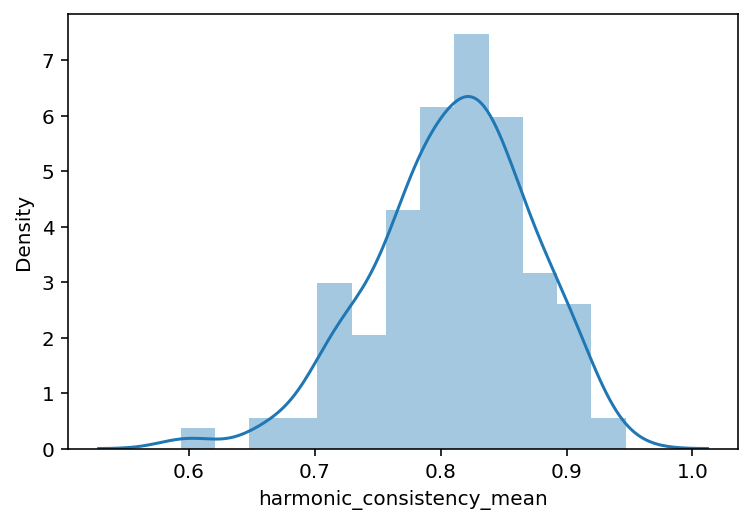

In [10]:
import seaborn as sns

sns.distplot(res['harmonic_consistency_mean'])

In [11]:
res['harmonic_consistency_mean'].sort_values(ascending=True).head(15)

Epistrophy.mid -0-                            0.593417
They Can't Take That Away From Me.mid -0-     0.606538
Deep Purple.mid -0-                           0.655282
Blue Monk.mid -0-                             0.660804
In A Mellow Tone.mid -0-                      0.669543
House Of Jade.mid -0-                         0.681136
Prelude To A Kiss.mid -0-                     0.685583
Straight, No Chaser.mid -0-                     0.6979
Speak No Evil.mid -0-                         0.703257
Anthropology.mid -0-                          0.705027
Oleo.mid -0-                                  0.706871
Lulu's Back In Town.mid -0-                   0.709857
I Can't Give You Anything But Love.mid -0-    0.710598
Make Someone Happy.mid -0-                    0.711281
Criss-Cross.mid -0-                           0.711629
Name: harmonic_consistency_mean, dtype: object

In [12]:
res['starting_measure'].value_counts()

2    196
5      1
Name: starting_measure, dtype: int64